In [2]:
# Predict over one sample of data and check what will be the prediction for that

In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [3]:
#Encoding the target column
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [4]:
max_review_len = max([len(s.split()) for s in sentences])
print(max_review_len)

2470


In [5]:
#tokenizing data
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

In [6]:
# Number of features, getting vocabulary
input_dim = max_review_len
vocab_size = len(tokenizer.word_index) + 1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs = pad_sequences(sentences, maxlen=max_review_len)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

In [7]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train, y_train, epochs=3, verbose=True, validation_data=(X_test, y_test), batch_size=256)

Epoch 1/3
293/293 [==============================] - 249s 850ms/step - loss: 3.0528 - acc: 0.3768 - val_loss: 1.2772 - val_acc: 0.3512
Epoch 2/3
293/293 [==============================] - 237s 808ms/step - loss: 1.2702 - acc: 0.3537 - val_loss: 1.2772 - val_acc: 0.4410
Epoch 3/3
293/293 [==============================] - 245s 836ms/step - loss: 1.2702 - acc: 0.3496 - val_loss: 1.2772 - val_acc: 0.3269


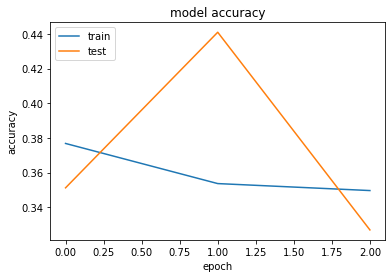

In [8]:
# For accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

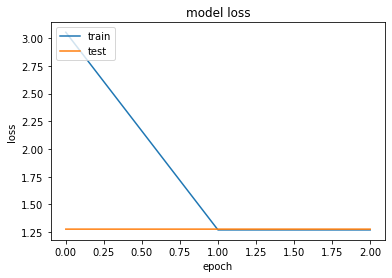

In [9]:
# For loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Predict over one sample of data and check what will be the prediction for that
predict = model.predict(X_test)
print("predicted value")
print(np.argmax(predict[17]))
print("Actual value")
print(y_test[17])

predicted value
2
Actual value
1
